# AE588 Assignment 2

# 2.3


In [38]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

# example 4.8 functions and directions
DIR_4_8 = np.array([4, 0.75])


def dir_4_8(x: npt.ArrayLike) -> float:
    return DIR_4_8


def grad_4_8(x: npt.ArrayLike):
    return [0.6*x[0]**5 - 6*x[0]**3 + 10*x[0] + 0.5*x[1], 0.4*x[1]**3 + 6*x[1] - 9 + 0.5*x[0]]


def fn_4_8(x: npt.ArrayLike) -> float:
    return 0.1*(x[0]**6) - 1.5*(x[0]**4) + 5*(x[0]**2) + 0.1 * (x[1]**4) + 3*(x[1]**2) - 9*x[1] + 0.5*x[0] * (x[1])


def normalized(v):
    return v / np.linalg.norm(v)


# function in a specific direction


def phi(f, start, dir, step):
    return f(start + dir*step)

# directional derivative
# dot prod to know how much the fn is expected to decrease in a particular dir


def dphi(df, start, dir, step):
    return np.dot(df(start + dir*step), dir)

In [39]:
# backtracking line search
def bktrk_lin_search(f, df, dir: npt.ArrayLike, guess: npt.ArrayLike, initial_step: float, suff_dec: float, bktrk: float):
    step = initial_step
    steps = [initial_step]
    fn_list = [phi(f, guess, dir, step)]
    # print(f"step: {step}, fx: {phi(f, guess, dir, step)}")
    phi_0 = phi(f, guess, dir, 0)
    dphi_0 = dphi(df, guess, dir, 0)
    # step+dir = step in a particular dir
    # dot prod to know how much the fn is expected to decrease in a particular dir
    while phi(f, guess, dir, step) > (phi_0 + suff_dec * step * dphi_0):
        step = bktrk * step
        # print(f"step: {step}, fx: {phi(f, guess, dir, step)}")
        steps.append(step)
        fn_list.append(phi(f, guess, dir, step))
    return steps, fn_list

# gradient optimization


def grad_opt(func, func_grad, func_dir, guess: npt.ArrayLike, tolerance: float, initial_step: float, suff_dec: float, bktrk: float):
    it = 0
    step = initial_step
    grad = func_grad(guess)
    val_list = [func(guess)]
    # gradient should tend towards 0, but wont here because we will never change to the right direction
    while np.linalg.norm(func_grad(guess), np.inf) > tolerance:
        print(
            f"it: {it}, step: {step}, guess: {guess}, fx: {func(guess)}, grad: {func_grad(guess)}")
        dir = func_dir(guess)
        steps, fn_list = bktrk_lin_search(func, func_grad(
            guess), dir, guess, step, suff_dec, bktrk)
        step = steps[-1]
        guess = guess + step * dir
        it += 1
        val_list.append(func(guess))
        # print(f"backtrack: {fn_list}")
        # print(
        #     f"it: {it}, step: {step}, guess: {guess}, fx: {func(guess)}, grad: {func_grad(guess)}")

    # plot optimization fn vs iterations
    # plt.plot(val_list)
    # plt.xlabel("iteration")
    # plt.ylabel("f")
    # plt.title("Optimization: Function vs iterations")
    # plt.show()
    return guess, func(guess)

2.3.a) Graphs for Example 4.8


final guess: [-0.8384  1.6616], grad: [-4.265805066897123, 2.3854142531584], dir grad: -15.274159577719692


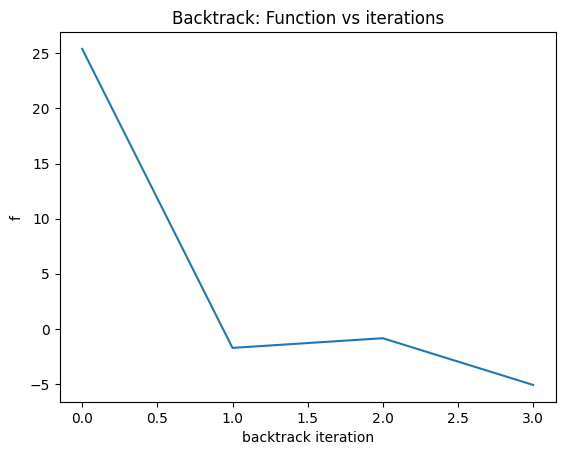

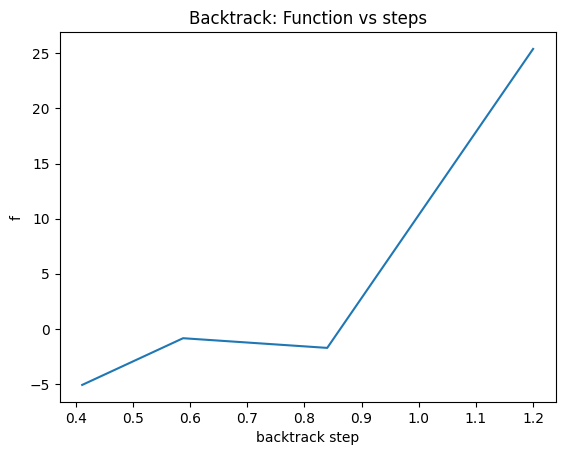

In [40]:
# run optimization on 4.8 with defaults
SUFF_DEC = 1e-4  # u
BKTRK = 0.7  # p
TOLERANCE = 1e-6  # t
GUESS_4_8 = np.array([-1.25, 1.25])
INITIAL_STEP = 1.2
# grad opt wont work because the direction function isnt implemented
# x, fx = grad_opt(fn_4_8, grad_4_8, dir_4_8, GUESS_4_8, TOLERANCE,
#                  INITAL_STEP, SUFF_DEC, BKTRK)
steps, fx = bktrk_lin_search(fn_4_8, grad_4_8, dir_4_8(
    GUESS_4_8), GUESS_4_8, INITIAL_STEP, SUFF_DEC, BKTRK)

print(
    f"final guess: {GUESS_4_8 + steps[-1]}, grad: {grad_4_8(GUESS_4_8 + steps[-1])}, dir grad: {np.dot(grad_4_8(GUESS_4_8 + steps[-1]), dir_4_8(GUESS_4_8))}")


# plot backtrack vs iterations
plt.plot(fx)
plt.xlabel("backtrack iteration")
plt.ylabel("f")
plt.title(f"Backtrack: Function vs iterations")
plt.show()


# plot backtrack vs step
plt.plot(steps, fx)
plt.xlabel("backtrack step")
plt.ylabel("f")
plt.title(f"Backtrack: Function vs steps")
plt.show()

In [41]:
# interpolation
def quad_interp_min(x1, x2, fx1, fx2, d_fx1):
    top = (2*x1*(fx2-fx1)+d_fx1*(x1**2 - x2**2))
    bottom = 2*((fx2-fx1)+d_fx1*(x1-x2))
    ans = top/bottom
    # see if ans is in between x1 and x2
    if np.linalg.norm(ans) < min(np.linalg.norm(x1), np.linalg.norm(x2)) or np.linalg.norm(ans) > max(np.linalg.norm(x1), np.linalg.norm(x2)):
        print(f"interpolation is out of range: {ans}")
        return (x2+x1)/2
    else:
        return ans

# pinpointing


def pinpoint(f, df, start, dir, step_low, step_high, suffdec, suffcur):
    phi_0 = phi(f, start, dir, 0)
    dphi_0 = dphi(df, start, dir, 0)
    phi_low = phi(f, start, dir, step_low)
    dphi_low = dphi(df, start, dir, step_low)
    phi_high = phi(f, start, dir, step_high)
    # dphi_high = dphi(df, start, dir, step_high)
    k = 0
    while True:
        # interpolate to find the min
        step = quad_interp_min(step_low, step_high,
                               phi_low, phi_high, dphi_low)
        phi_step = phi(f, start, dir, step)
        if (phi_step > phi_0 + suffdec*step*dphi_0) or (phi_step > phi_low):
            # if the interpolated step is higher, make it the new high
            step_high = step
            phi_high = phi_step
            # dphi_high = dphi(df, start, dir, step_high)
        else:
            # if the interpolated step is lower, check its gradient
            dphi_step = dphi(df, start, dir, step)
            if abs(dphi_step) <= -suffcur*dphi_0:
                # the gradient is low enough, exit
                return step
            elif dphi_step * (step_high-step_low) >= 0:
                # step predicts an increase, from here
                # since this is already below phi_0, relocate high to the prev low
                step_high = step_low
            step_low = step
        k += 1


# bracketing
def bracket(f, df, start, dir, step_init, suffdec, suffcur, stepinc):
    phi_0 = phi(f, start, dir, 0)
    dphi_0 = dphi(df, start, dir, 0)
    step_1 = 0
    step_2 = step_init
    phi_1 = phi_0
    first = True
    while True:
        phi_2 = phi(f, start, dir, step_2)
        dphi_2 = dphi(df, start, dir, step_2)
        if (phi_2 > phi_0 + suffdec * step_2 * phi_0) or (not first and phi_2 > phi_1):
            # the end of the bracket is above the start
            step = pinpoint(f, df, start, dir, step_1,
                            step_2, suffdec, suffcur)
            return step, phi(f, start, dir, step), dphi(df, start, dir, step)
        if abs(dphi_2) <= -suffcur * dphi_0:
            # the gradient is already low enough, return
            step = step_2
            return step, phi(f, start, dir, step), dphi(df, start, dir, step)
        elif dphi_2 >= 0:
            # the gradient is increasing, can pinpoint
            step = pinpoint(f, df, start, dir, step_2,
                            step_1, suffdec, suffcur)
            return step, phi(f, start, dir, step), dphi(df, start, dir, step)

        else:
            # no valid bracket found, move forward and repeat
            step_1 = step_2
            step_2 = stepinc*step_2
        first = False

2.3.a) Graphs for example 4.9


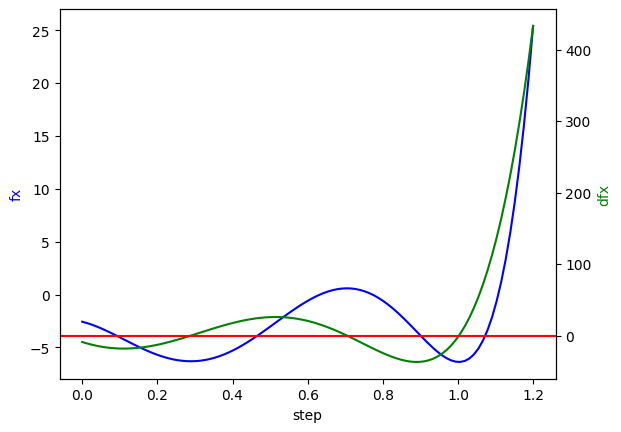

0.2873199238327226 -6.308416150679045 -0.32218760635332055


In [44]:
GUESS_4_8 = np.array([-1.25, 1.25])
steps = np.linspace(0, 1.2, 100)
fx = [phi(fn_4_8, GUESS_4_8, dir_4_8(GUESS_4_8), step)
      for step in steps]
dfx = [dphi(grad_4_8, GUESS_4_8, dir_4_8(GUESS_4_8), step)
       for step in steps]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(steps, fx, 'b-')
ax2.plot(steps, dfx, 'g-')

ax1.set_xlabel('step')
ax1.set_ylabel('fx', color='b')
ax2.set_ylabel('dfx', color='g')

plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# run bracketing on 4.9 with defaults
SUFF_DEC = 1e-4  # u1
SUFF_CUR = 0.9  # u2
STEP_INCR = 2
TOLERANCE = 1e-6  # t
INITAL_STEP = 0.05
x, fx, dfx = bracket(fn_4_8, grad_4_8, GUESS_4_8, dir_4_8(GUESS_4_8),
                     INITAL_STEP, SUFF_DEC, SUFF_CUR, STEP_INCR)
print(x, fx, dfx)